# Titanic Survival Prediction


### The notebook uses the following techniques- 
1) Replacing null values
<br>
2) Label Encoding
<br>
3) Standard Scaling
<br>
4) Train test split
<br>
5) GridSearchCV
<br>
6) RandomForestClassifier

In [23]:
#Importing libraries
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 6)
sns.set_theme(style="whitegrid")

In [24]:
#Reading data into workspace
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [25]:
#Printing the first five rows of the data
display(train_df.head())
display(test_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
#Looking at the summary statistics of numerical data
display(train_df.describe())
display(test_df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [27]:
#Looking at the summary statistics of character data
display(train_df.describe(include= ['O']))
display(test_df.describe(include= ['O']))

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [28]:
#Displaying the null data
display(train_df.isna().sum())
display(test_df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
#Replacing the null values of age with the median of age and gender 
train_df['Age'][train_df['Sex']=='female'] = train_df['Age'][train_df['Sex']=='female'].fillna(train_df['Age'][train_df['Sex']=='female'].median())
train_df['Age'][train_df['Sex']=='male'] = train_df['Age'][train_df['Sex']=='male'].fillna(train_df['Age'][train_df['Sex']=='male'].median())

test_df['Age'][test_df['Sex']=='female'] = test_df['Age'][test_df['Sex']=='female'].fillna(test_df['Age'][test_df['Sex']=='female'].median())
test_df['Age'][test_df['Sex']=='male'] = test_df['Age'][test_df['Sex']=='male'].fillna(test_df['Age'][test_df['Sex']=='male'].median())


C:\Users\user\anaconda3\envs\ProjectsEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\envs\ProjectsEnv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\anaconda3\envs\ProjectsEnv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [30]:
#Replacing value the null values of embarked and fare
train_df['Embarked'].fillna(train_df['Embarked'].dropna().mode()[0], inplace= True)
test_df['Fare'].replace(np.nan, np.mean(test_df['Fare']), inplace= True)

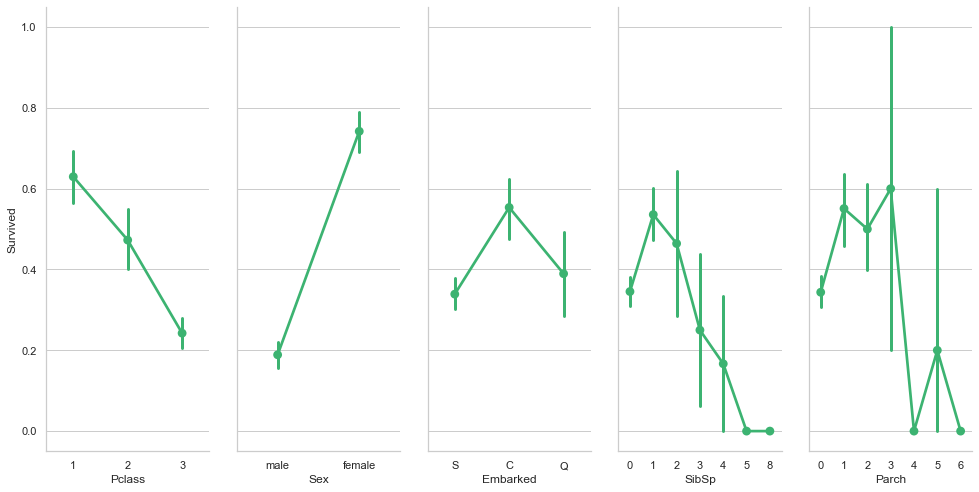

In [31]:
#Looking at the percentage of survival accross categorical data using pointplot
g = sns.PairGrid(train_df, y_vars= 'Survived',
                 x_vars=['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch'],
                 height= 7, aspect= 0.4)

g.map(sns.pointplot, scale= 1, errwidth= 3, color= 'mediumseagreen')

In [32]:
#Combining test and train data to feature engineer to create family column which includes the Parch and SibSp columns
combined_df = [train_df, test_df]
for i in combined_df:
    i['family'] = i['Parch'] + i['SibSp'] + 1

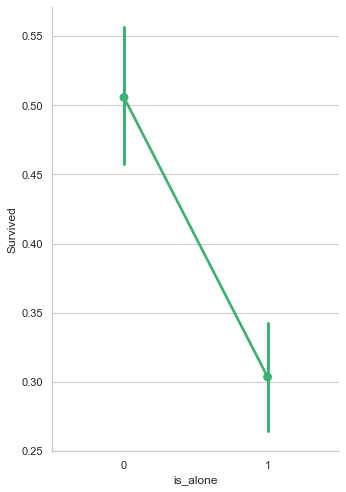

In [33]:
#Creating is_alone column and displying the results using a pointplot
for i in combined_df:
    i['is_alone'] = 0
    i.loc[i['family'] == 1, 'is_alone'] = 1

g = sns.PairGrid(train_df, y_vars= 'Survived',
                 x_vars= 'is_alone',
                 height= 7, aspect= 0.7)

g.map(sns.pointplot, scale= 1, errwidth= 3, color= 'mediumseagreen')

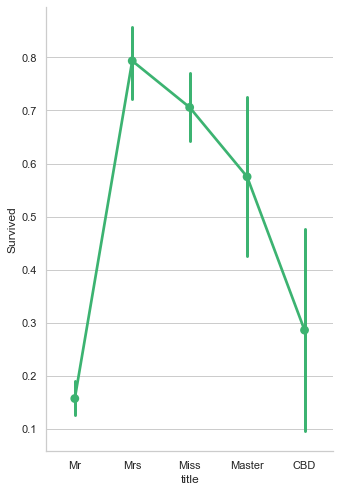

In [34]:
#Extrating the title out of names to create the title column and displaying the results using a pointplot
for i in combined_df:
    i['title'] = i.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

for i in combined_df:
    i['title'] = i['title'].replace(['Jonkheer', 'Dona',
 	'Dr', 'Don', 'Major', 'Col', 'Sir', 'Capt', 'Rev'], 'CBD')
    
    i['title'] = i['title'].replace(['Mlle', 'Lady', 'Countess'], 'Miss')
    i['title'] = i['title'].replace('Ms', 'Miss')
    i['title'] = i['title'].replace('Mme', 'Mrs')

g = sns.PairGrid(train_df, y_vars= 'Survived',
                 x_vars= 'title',
                 height= 7, aspect= .7)
g.map(sns.pointplot, scale= 1, errwidth= 3, color= 'mediumseagreen')

In [35]:
#Coverting categorical values into labels using sklearn's LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_sex = LabelEncoder()
label_embark = LabelEncoder()
label_title = LabelEncoder()
label_title = LabelEncoder()

for i in combined_df:
    i['Sex'] = label_sex.fit_transform(i['Sex'])


for i in combined_df:
    i['Embarked'] = label_embark.fit_transform(i['Embarked'])


for i in combined_df:
    i['title'] = label_title.fit_transform(i['title'])

In [36]:
#Dropping columns which will not be used in building our model
passenger_id = test_df['PassengerId']
for i in combined_df:
    i.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis= 1, inplace= True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,is_alone,title
0,0,3,1,22.0,1,0,7.2500,2,2,0,3
1,1,1,0,38.0,1,0,71.2833,0,2,0,4
2,1,3,0,26.0,0,0,7.9250,2,1,1,2
3,1,1,0,35.0,1,0,53.1000,2,2,0,4
4,0,3,1,35.0,0,0,8.0500,2,1,1,3


<AxesSubplot:>

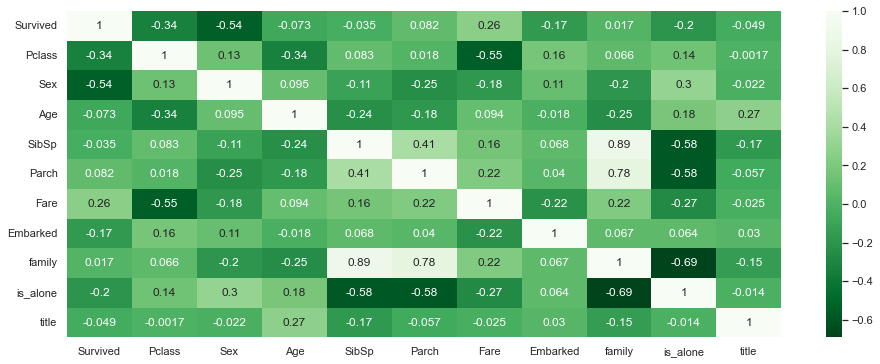

In [37]:
#Looking at the correlation of the data
corr = train_df.corr()
sns.heatmap(corr, cmap= 'Greens_r', annot = True)

In [38]:
#Standardising the Fare column using sklearn's StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_fare_train_df = train_df['Fare'].values.reshape(-1, 1)
fare_scaled_train_df = scaler.fit_transform(data_fare_train_df)
train_df['scaled_fare'] = fare_scaled_train_df

data_fare_test_df = test_df['Fare'].values.reshape(-1, 1)
fare_scaled_test_df = scaler.fit_transform(data_fare_test_df)
test_df['scaled_fare'] = fare_scaled_test_df
display(train_df.isna().sum())


Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
family         0
is_alone       0
title          0
scaled_fare    0
dtype: int64

In [39]:
#Dropping columns which have were used to feature engineer new columns
for i in combined_df:
    i.drop(['Fare', 'SibSp', 'Parch', 'family'], axis= 1, inplace= True)

In [40]:
#Standardising the Age column using sklearn's StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_age_train_df = train_df['Age'].values.reshape(-1, 1)
age_scaled_train_df = scaler.fit_transform(data_age_train_df)
train_df['Age'] = age_scaled_train_df

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_age_test_df = test_df['Age'].values.reshape(-1, 1)
age_scaled_test_df = scaler.fit_transform(data_age_test_df)
test_df['Age'] = age_scaled_test_df

In [41]:
#Splitting the data into target and predictor variables
X = train_df.drop('Survived', axis= 1)
Y = train_df['Survived'].values

In [42]:
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
x_train_df,x_test_df,y_train_df,y_test_df = train_test_split(X, Y,test_size= 0.3 , random_state= 2)

In [43]:
#Finding the right parameters for RandomForestClssifier using GridSearchCV and fitting the data
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

param_grid = {'n_estimators': [100, 200, 300, 400, 500],
             'min_samples_leaf': np.arange(0.1, 1)}
rf = RandomForestClassifier()
grid = GridSearchCV(estimator= rf, param_grid= param_grid, scoring= 'accuracy', cv= 10)

grid.fit(X, Y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': array([0.1]),
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [44]:
#Predicting the data and getting the accuracy score
pred = grid.predict(test_df)
gender_df = pd.read_csv('gender_submission.csv' , usecols= ['Survived'])
display(accuracy_score(gender_df, pred))
classification_report(gender_df, pred)

0.854066985645933

'              precision    recall  f1-score   support\n\n           0       0.82      0.98      0.90       266\n           1       0.96      0.62      0.76       152\n\n    accuracy                           0.85       418\n   macro avg       0.89      0.80      0.83       418\nweighted avg       0.87      0.85      0.85       418\n'

In [45]:
#Coverting the final prediction to csv to submit
sub = pd.DataFrame({
        'PassengerId': passenger_id ,
        'Survived': pred})
sub.to_csv('sub.csv', index= False)